In [1]:
import numpy as np
import pandas as pd
import datetime
import os

from DP_LSTM import *
from keras.models import load_model
from pandas.tools.plotting import autocorrelation_plot
from sklearn.preprocessing import MinMaxScaler
from Plot_Self_Correlation import get_auto_corr

from matplotlib import pyplot as plt

A:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
'''文件读取模块'''
def walkfiles(rootdir): # 返回file路径的list
    flist = os.listdir(rootdir) #列出文件夹下所有的目录与文件
    pathContainer = []
    filenameContainer = []
    for i in range(0,len(flist)):
        path = os.path.join(rootdir,flist[i])
        if os.path.isfile(path):
            pathContainer.append(path)
            filenameContainer.append(flist[i])
    return pathContainer,filenameContainer

'''数据处理模块'''
def GetTimeScale(data_pd, timescale):#根据给定的时间宽度构造数据
    return_pd = data_pd.loc[data_pd.index % timescale == 0]
    return_pd.index = [i for i in range(return_pd.shape[0])]
    return return_pd

In [3]:
'''输入文件路径,
    滞后阶数k,
'''
def plotAutoCorrelation(rootdir,k,timescale = 5):
#     plt.figure(figsize=(8,5), dpi=80)
#     plt.subplot(1,1,1)
    pathContainer,filenameContainer = walkfiles(rootdir)
    for i in range(0,len(pathContainer)):
        data_pd = pd.read_csv(pathContainer[i])
        data_pd['DateTime'] = pd.to_datetime(data_pd.DateTime)
        data_pd = data_pd.iloc[:92258,:]
        test_pd = GetTimeScale(data_pd,timescale)
        print('时间粒度： ',timescale,'   :',test_pd.shape[0])
#         timeSeries = np.array(test_pd.ExgRate)
        timeSeries = test_pd.ExgRate
        filename = filenameContainer[i]
#         timeLat_Coval = []
#         for i in range(1,k+1):
#             timeLat_Coval.append(get_auto_corr(timeSeries,i))
#         plt.plot(range(1,len(timeLat_Coval)+1),timeLat_Coval,label=filename.split('.')[0],linewidth=4) 
        autocorrelation_plot(timeSeries)
#         test_diff1 =timeSeries.diff(10)
#         test_diff1.plot(label=filename.split('.')[0])
#         break
#     plt.xlabel(r'Time Lag')
#     plt.ylabel(r'Auto Correlation')
#     plt.legend()
#     plt.show()
    return 

时间粒度：  5    : 18452


A:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.


时间粒度：  5    : 18452


A:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.


时间粒度：  5    : 18452


A:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.


时间粒度：  5    : 18452


A:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.


时间粒度：  5    : 18452


A:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.


时间粒度：  5    : 18452


A:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.


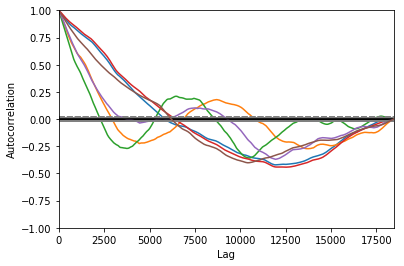

In [4]:
rootdir = 'D:\WORK__wells\GraduateProgram\Data\TimeSeries'
plotAutoCorrelation(rootdir, 100,timescale = 5)
# pathContainer,filenameContainer = walkfiles(rootdir)
# filenameContainer[1].split('.')[0]

In [5]:
# result_pd = test_pd.describe()
# result_pd.to_csv(r'D:\WORK__wells\GraduateProgram\Result\result.csv')

In [6]:

# data_series = test_pd.ExgRate

# plt.figure(figsize=(8,5), dpi=70)
# plt.subplot(1,1,1)
# plt.plot(data_series,color='b',label=r'AUD/USD')
# plt.title(r'2017/1/1-2017/3/31 AUD/USD Exchange Rate')
# plt.xlabel(r'Time Point')
# plt.ylabel(r'Exchange Rate Value')
# plt.legend()
# plt.show()

In [7]:
# test_diff1 =data_series.diff(10)
# test_diff1.plot()
